In [5]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sarithavuppula/Downloads/Summer School/final_version_data.csv'
df = pd.read_csv(file_path)
df = df.iloc[:, 1:]  # Remove the unnecessary index column

# Function to extract features
def extract_features(df):
    colnames = ['cycle', 'condition', 'mode', 'pin_mean', 'po_mean', 'pdmp_mean',
                'pin_var', 'po_var', 'pdmp_var', 'pin_kurtosis', 'po_kurtosis', 'pdmp_kurtosis']
    features = np.empty((0, len(colnames)))

    for condition in df['condition'].unique():
        condition_df = df[df.condition == condition]
        for mode in condition_df['mode'].unique():
            mode_df = condition_df[condition_df['mode'] == mode]
            for cycle in mode_df['cycle'].unique():
                cycle_df = mode_df[mode_df.cycle == cycle]
                mean_vals = np.mean(cycle_df[['pin', 'po', 'pdmp']], axis=0).tolist()
                variance_vals = np.var(cycle_df[['pin', 'po', 'pdmp']], axis=0).tolist()
                kurtosis_vals = kurtosis(cycle_df[['pin', 'po', 'pdmp']]).tolist()
                meta_data = [np.unique(cycle_df['cycle'])[0], np.unique(cycle_df['condition'])[0], np.unique(cycle_df['mode'])[0]]
                
                feature = np.array(meta_data + mean_vals + variance_vals + kurtosis_vals).reshape(1, -1)
                features = np.concatenate([features, feature], axis=0)

    return pd.DataFrame(features, columns=colnames)

# Extract features for condition1 and mode2
cond1_mode2_df = df[(df['condition'] == 1) & (df['mode'] == 2)]
features_cond1_mode2 = extract_features(cond1_mode2_df)
print("Features for Condition 1 and Mode 2:")
print(features_cond1_mode2.head())

# Extract features for all conditions and modes
features_all = extract_features(df)
print("Features for All Conditions and Modes:")
print(features_all.head())

# Compare features for cycle10, condition2, mode1 vs cycle999, condition2, mode1
cycle10_cond2_mode1 = features_all[(features_all['cycle'] == 10) & (features_all['condition'] == 2) & (features_all['mode'] == 1)]
cycle999_cond2_mode1 = features_all[(features_all['cycle'] == 999) & (features_all['condition'] == 2) & (features_all['mode'] == 1)]

# Check if the dataframes are empty
if cycle10_cond2_mode1.empty:
    print("No data available for Cycle 10, Condition 2, Mode 1")
if cycle999_cond2_mode1.empty:
    print("No data available for Cycle 999, Condition 2, Mode 1")

# Function to display comparison
def compare_features(feature_set1, feature_set2, label1, label2):
    if feature_set1.empty or feature_set2.empty:
        print(f"Cannot compare {label1} and {label2} due to missing data.")
        return

    print(f"Comparison of {label1} vs {label2}")
    for col in feature_set1.columns[3:]:
        print(f"{col}:")
        print(f"  {label1}: {feature_set1[col].values[0]}")
        print(f"  {label2}: {feature_set2[col].values[0]}")
        print()

# Perform the comparison
compare_features(cycle10_cond2_mode1, cycle999_cond2_mode1, 'Cycle 10, Condition 2, Mode 1', 'Cycle 999, Condition 2, Mode 1')

Features for Condition 1 and Mode 2:
    cycle  condition  mode      pin_mean       po_mean     pdmp_mean  \
0     0.0        1.0   2.0  1.437700e-08  1.597444e-09  2.076677e-08   
1    10.0        1.0   2.0  6.400000e-09  3.200000e-09  9.600000e-09   
2   101.0        1.0   2.0  4.694836e-09 -2.347418e-08  1.251956e-08   
3  1027.0        1.0   2.0  4.769475e-09  6.359300e-09 -3.179650e-09   
4  1029.0        1.0   2.0 -3.159558e-09 -1.105845e-08  1.579779e-09   

    pin_var    po_var  pdmp_var  pin_kurtosis  po_kurtosis  pdmp_kurtosis  
0  0.998403  0.998403  0.998403     -0.032096    -1.699003      -0.665810  
1  0.998400  0.998400  0.998400      0.001875    -1.689393      -0.715125  
2  0.998435  0.998435  0.998435     -0.022927    -1.691038      -0.716852  
3  0.998410  0.998410  0.998410     -0.074127    -1.692296      -0.396213  
4  0.998420  0.998420  0.998420     -0.077650    -1.688438      -0.628041  
Features for All Conditions and Modes:
    cycle  condition  mode      pin

In [8]:
features_all.to_csv('/Users/sarithavuppula/Downloads/Summer School/Research_Project_Feature_Extr.csv', index=None)

In [9]:
feature_all = pd.read_csv('/Users/sarithavuppula/Downloads/Summer School/Research_Project_Feature_Extr.csv')

In [11]:
c1_features = feature_all[feature_all.condition==1]

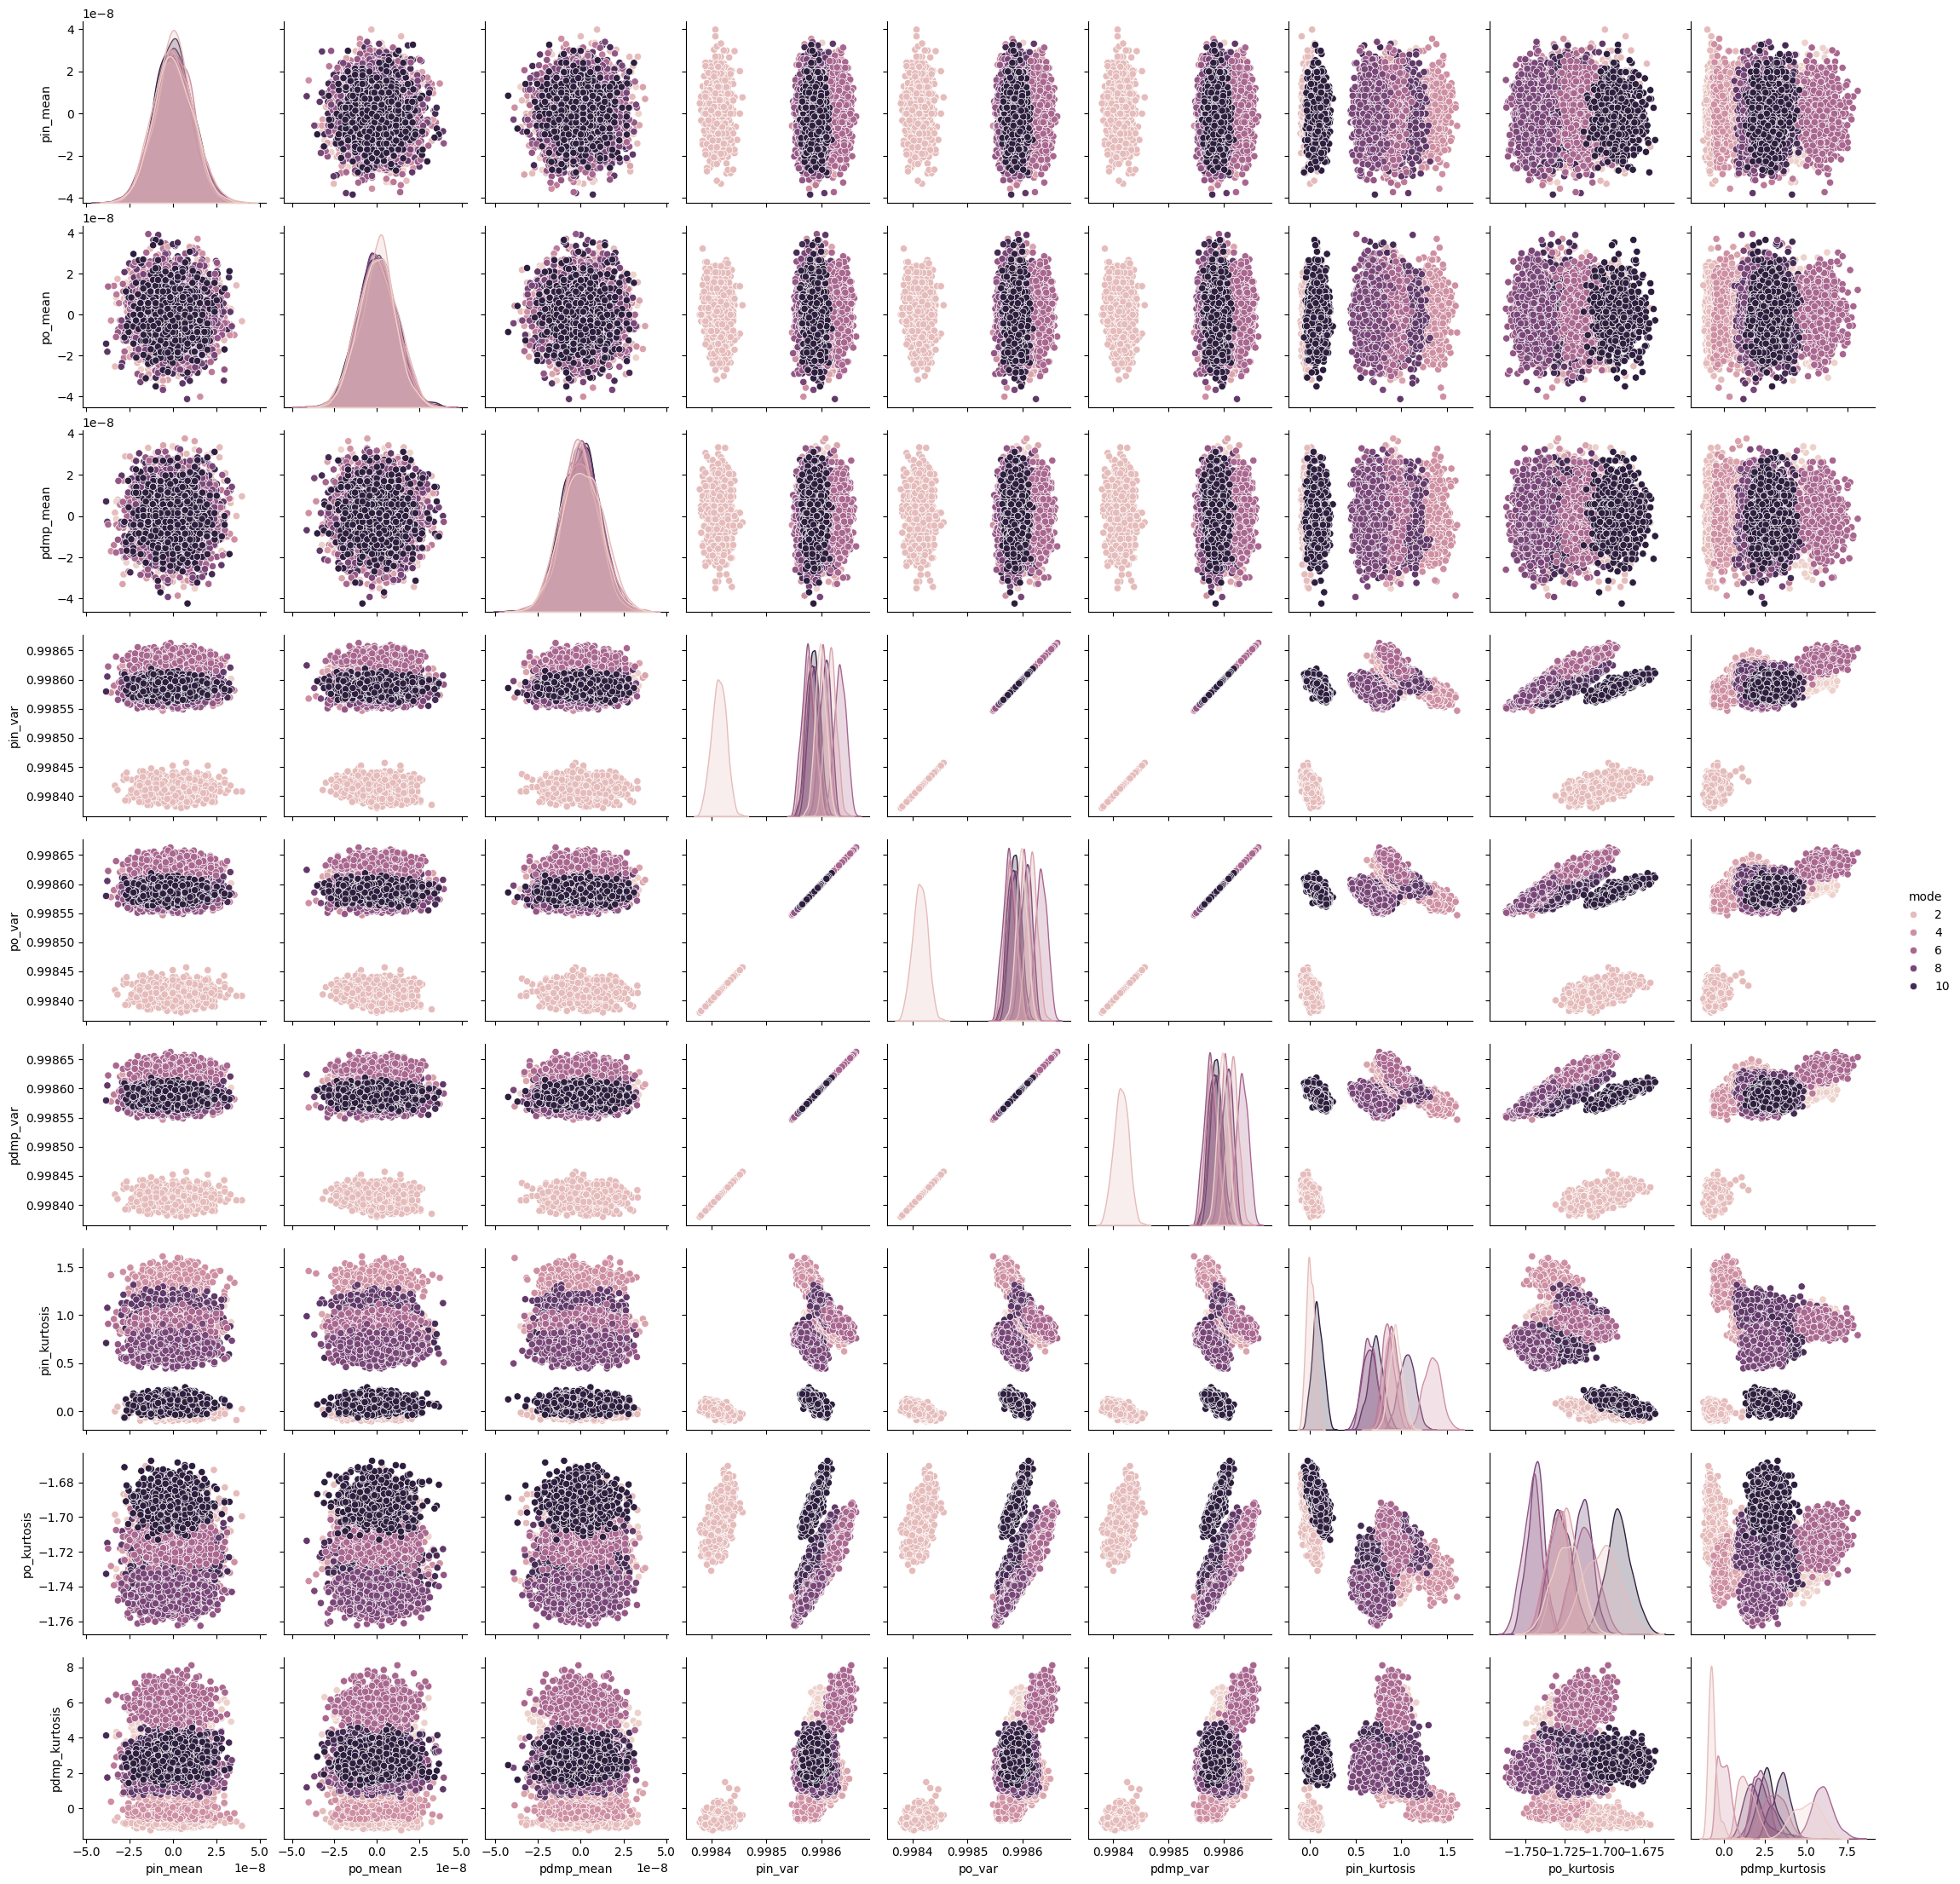

In [14]:
sns.pairplot(c1_features.drop(['cycle', 'condition'], axis=1), hue='mode')
